In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
transactions = pd.read_csv("Transactions.csv")
products = pd.read_csv("Products_with_Categories.csv")

In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Member_number  38765 non-null  int64 
 1   Date           38765 non-null  object
 2   productId      38765 non-null  int64 
 3   items          38765 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.2+ MB


In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   productId    167 non-null    int64  
 1   productName  167 non-null    object 
 2   price        167 non-null    float64
 3   Category     167 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 5.3+ KB


In [ ]:
products["Category"].value_counts()

Category
Fresh Food                 27
Household & Hygiene        26
Beverages                  20
Bakery & Sweets            19
Frozen & Processed Food    18
Dairy                      17
Pantry Staples             14
Specialty & Seasonal        8
Personal Care               8
Snacks                      7
Pet Care                    3
Name: count, dtype: int64

In [ ]:
merged_df = transactions.merge(products, on="productId", how="left")

In [ ]:
merged_df.head()

,Member_number,Date,productId,items,productName,price,Category
0,1808,21-07-2015,1,3,tropical fruit,7.8,Fresh Food
1,2552,05-01-2015,2,1,whole milk,1.8,Dairy
2,2300,19-09-2015,3,3,pip fruit,3.0,Fresh Food
3,1187,12-12-2015,4,3,other vegetables,0.8,Fresh Food
4,3037,01-02-2015,2,1,whole milk,1.8,Dairy


In [ ]:
merged_df["Date"] = pd.to_datetime(merged_df["Date"], format="%d-%m-%Y")


In [ ]:
merged_df.isna().sum()

Member_number    0
Date             0
productId        0
items            0
productName      0
price            0
Category         0
dtype: int64

In [ ]:
merged_df["total_price"] = merged_df["items"] * merged_df["price"]

In [ ]:
# Thêm các cột thời gian
merged_df['day_of_week'] = merged_df['Date'].dt.day_name()
merged_df['month'] = merged_df['Date'].dt.month
merged_df['year'] = merged_df['Date'].dt.year
merged_df['Month'] = merged_df['Date'].dt.to_period('M')

In [ ]:
merged_df['order_id'] = merged_df.groupby(['Date', 'Member_number']).ngroup()

In [ ]:
merged_df.head()

,Member_number,Date,productId,items,productName,price,Category,total_price,day_of_week,month,year,Month,order_id
0,1808,2015-07-21,1,3,tropical fruit,7.8,Fresh Food,23.4,Tuesday,7,2015,2015-07,11847
1,2552,2015-01-05,2,1,whole milk,1.8,Dairy,1.8,Monday,1,2015,2015-01,8058
2,2300,2015-09-19,3,3,pip fruit,3.0,Fresh Food,9.0,Saturday,9,2015,2015-09,13016
3,1187,2015-12-12,4,3,other vegetables,0.8,Fresh Food,2.4,Saturday,12,2015,2015-12,14625
4,3037,2015-02-01,2,1,whole milk,1.8,Dairy,1.8,Sunday,2,2015,2015-02,8611


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Member_number  38765 non-null  int64         
 1   Date           38765 non-null  datetime64[ns]
 2   productId      38765 non-null  int64         
 3   items          38765 non-null  int64         
 4   productName    38765 non-null  object        
 5   price          38765 non-null  float64       
 6   Category       38765 non-null  object        
 7   total_price    38765 non-null  float64       
 8   day_of_week    38765 non-null  object        
 9   month          38765 non-null  int32         
 10  year           38765 non-null  int32         
 11  Month          38765 non-null  period[M]     
 12  order_id       38765 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(4), object(3), period[M](1)
memory usage: 3.5+ MB


In [ ]:
merged_df['order_id'].max()

14962

###  Phân tích đặc điểm khách hàng

In [ ]:
# Số lượng khách hàng duy nhất
unique_customers = merged_df['Member_number'].nunique()
print(f"Số lượng khách hàng duy nhất: {unique_customers}")

# Kiểm tra khoảng thời gian giao dịch
min_date = merged_df['Date'].min()
max_date = merged_df['Date'].max()
print(f"Khoảng thời gian giao dịch: từ {min_date} đến {max_date}")

# Kiểm tra số giao dịch không có ID khách hàng
missing_customer_id = merged_df['Member_number'].isna().sum()
print(f"Số lượng giao dịch không có ID khách hàng: {missing_customer_id}")

Số lượng khách hàng duy nhất: 3898
Khoảng thời gian giao dịch: từ 2014-01-01 00:00:00 đến 2015-12-30 00:00:00
Số lượng giao dịch không có ID khách hàng: 0


###  Phân tích sản phẩm

In [ ]:
top_products = merged_df['productName'].value_counts().head(10)
category_counts = merged_df['Category'].value_counts()
revenue_by_category = merged_df.groupby('Category')['total_price'].sum().sort_values(ascending=False)

/tmp/ipykernel_37243/1476188795.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis', ax=axs[0])
/tmp/ipykernel_37243/1476188795.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=worst_products.values, y=worst_products.index, palette='Reds_r', ax=axs[1])
/tmp/ipykernel_37243/1476188795.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.values, y=category_sales.index, palette='coolwarm', ax=axs[2])
/tmp/ipykernel_37243/1476188795.py:25: FutureWarning: 

Pass

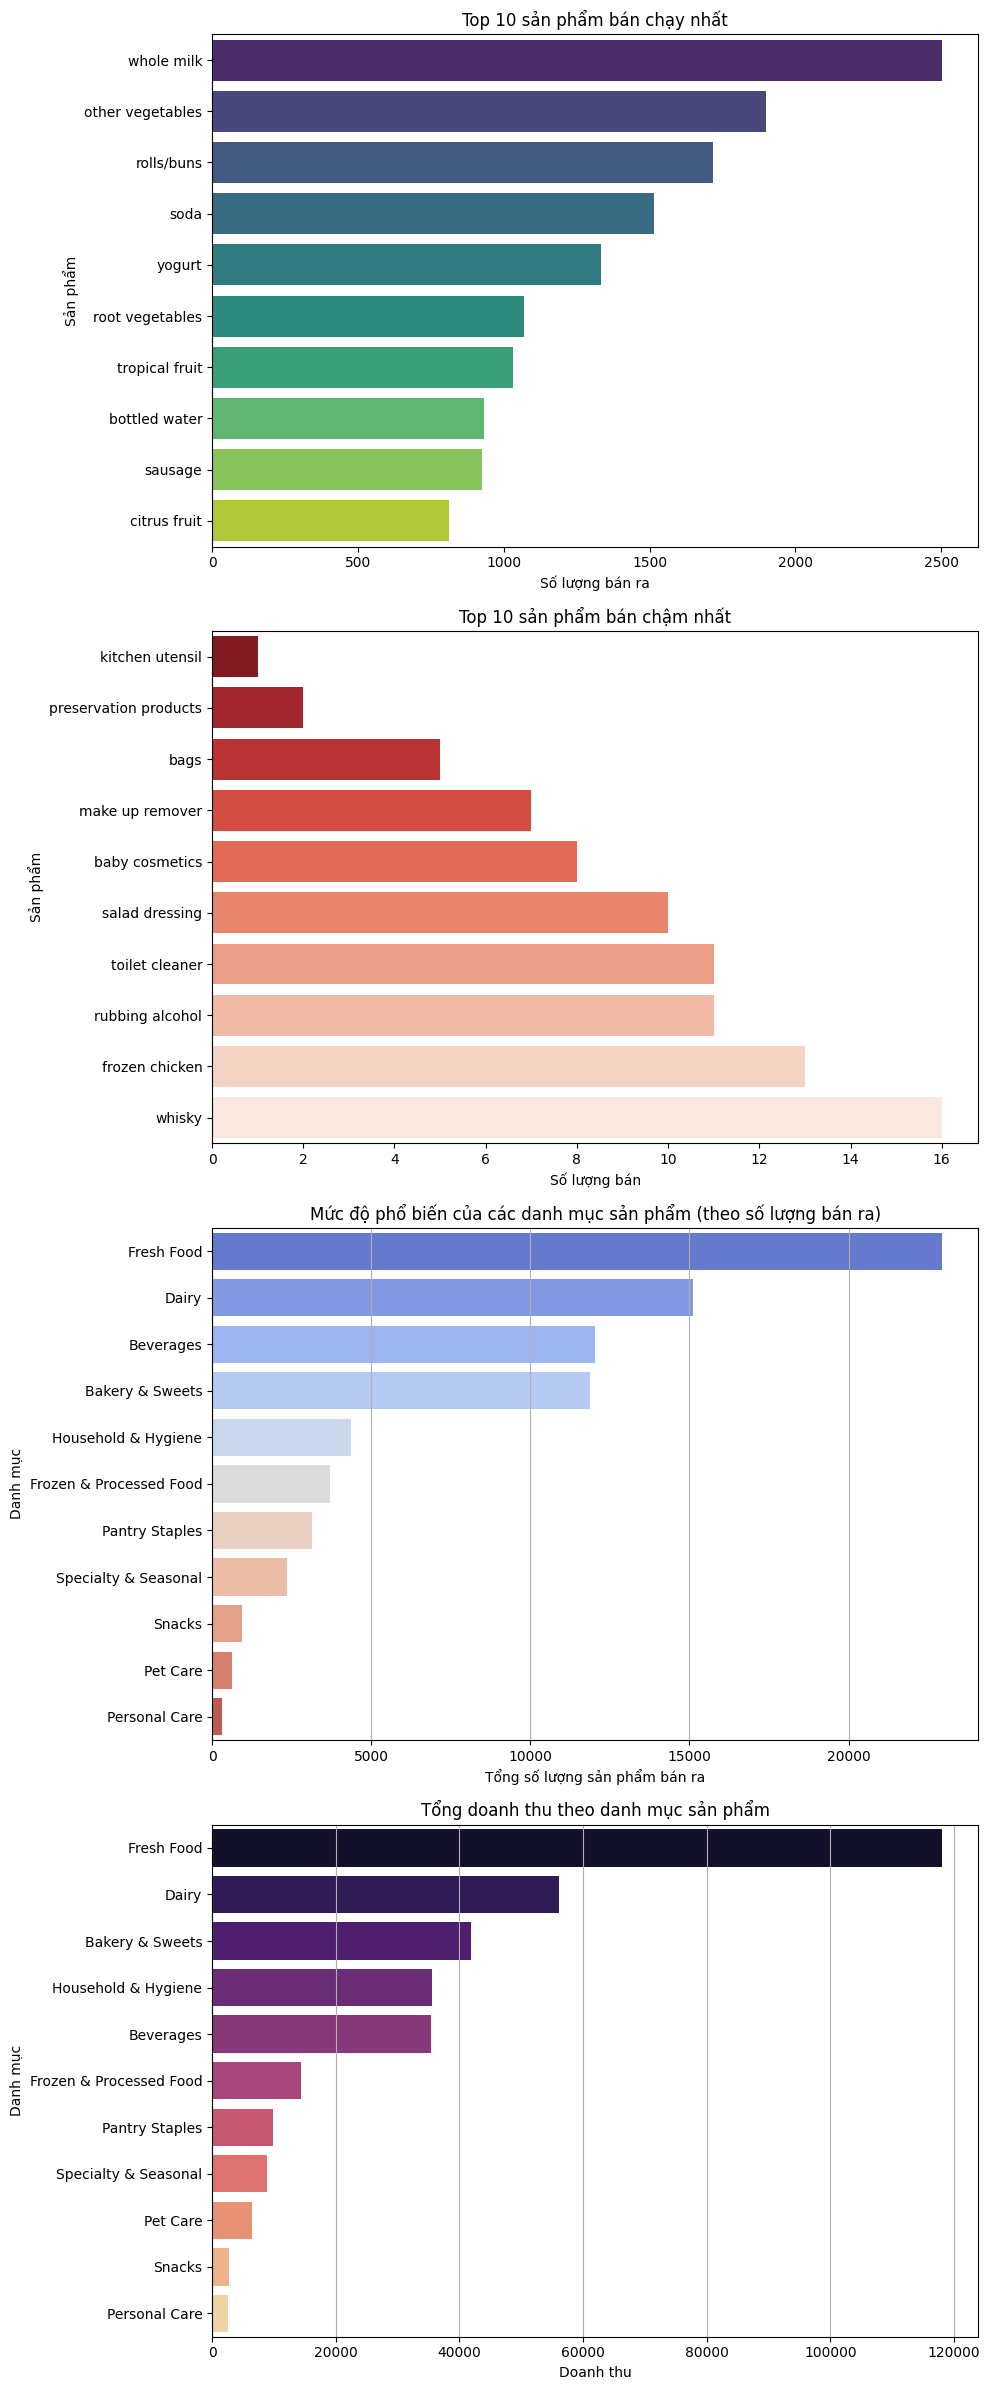

In [ ]:
fig, axs = plt.subplots(4, 1, figsize=(10, 24))  # 4 biểu đồ dọc

# Biểu đồ 1: Top 10 sản phẩm bán chạy nhất
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis', ax=axs[0])
axs[0].set_title('Top 10 sản phẩm bán chạy nhất')
axs[0].set_xlabel('Số lượng bán ra')
axs[0].set_ylabel('Sản phẩm')

# Biểu đồ 2: Top 10 sản phẩm bán chậm nhất
worst_products = merged_df.groupby('productName')['items'].sum().sort_values().head(10)
sns.barplot(x=worst_products.values, y=worst_products.index, palette='Reds_r', ax=axs[1])
axs[1].set_title('Top 10 sản phẩm bán chậm nhất')
axs[1].set_xlabel('Số lượng bán')
axs[1].set_ylabel('Sản phẩm')

# Biểu đồ 3: Mức độ phổ biến của các danh mục sản phẩm
category_sales = merged_df.groupby('Category')['items'].sum().sort_values(ascending=False)
sns.barplot(x=category_sales.values, y=category_sales.index, palette='coolwarm', ax=axs[2])
axs[2].set_title('Mức độ phổ biến của các danh mục sản phẩm (theo số lượng bán ra)')
axs[2].set_xlabel('Tổng số lượng sản phẩm bán ra')
axs[2].set_ylabel('Danh mục')
axs[2].grid(axis='x')

# Biểu đồ 4: Tổng doanh thu theo danh mục sản phẩm
sns.barplot(x=revenue_by_category.values, y=revenue_by_category.index, palette='magma', ax=axs[3])
axs[3].set_title('Tổng doanh thu theo danh mục sản phẩm')
axs[3].set_xlabel('Doanh thu')
axs[3].set_ylabel('Danh mục')
axs[3].grid(axis='x')

plt.tight_layout()
plt.show()

### Phân tích đơn hàng

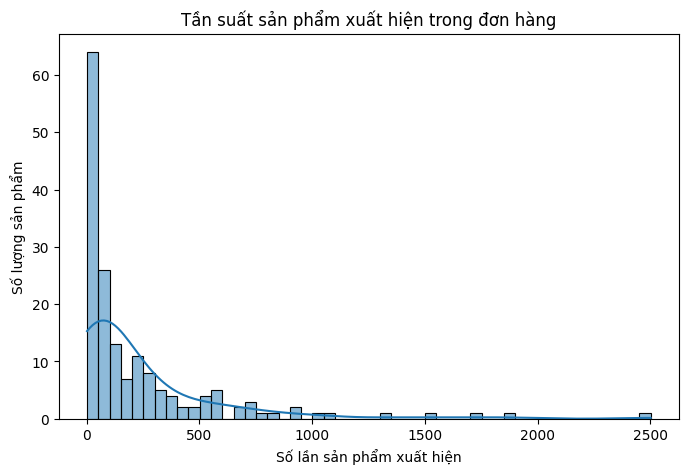

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(merged_df['productName'].value_counts(), bins=50, kde=True)
plt.xlabel('Số lần sản phẩm xuất hiện')
plt.ylabel('Số lượng sản phẩm')
plt.title('Tần suất sản phẩm xuất hiện trong đơn hàng')
plt.show()


In [ ]:
product_counts = merged_df['productName'].value_counts()
print(product_counts.describe())
print(product_counts.quantile([0.25, 0.5, 0.75, 0.80, 0.85, 0.90]))

count     167.000000
mean      232.125749
std       363.442098
min         1.000000
25%        30.500000
50%        85.000000
75%       264.000000
max      2502.000000
Name: count, dtype: float64
0.25     30.5
0.50     85.0
0.75    264.0
0.80    333.4
0.85    493.3
0.90    586.4
Name: count, dtype: float64


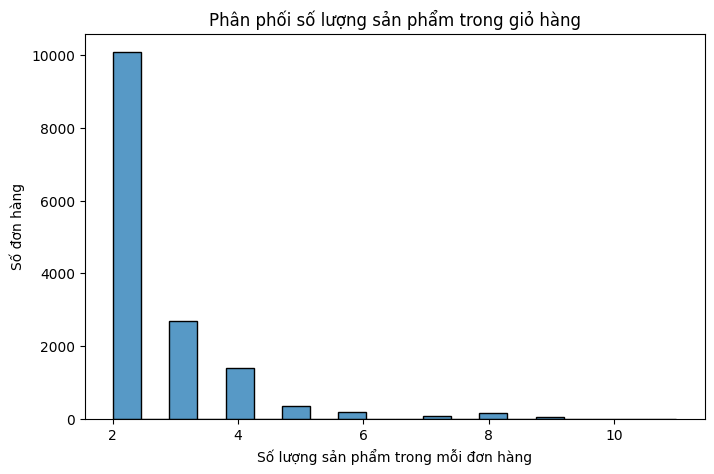

In [ ]:
# Đếm số lượng sản phẩm trong từng đơn hàng
basket_size = merged_df.groupby(['Member_number', 'Date']).size()

plt.figure(figsize=(8,5))
sns.histplot(basket_size, bins=20, kde=False)
plt.xlabel('Số lượng sản phẩm trong mỗi đơn hàng')
plt.ylabel('Số đơn hàng')
plt.title('Phân phối số lượng sản phẩm trong giỏ hàng')
plt.show()


In [ ]:
# tổng doanh thu
total_revenue = merged_df['total_price'].sum()
print(f"Tổng doanh thu: {total_revenue:,.0f}")

# doanh thu theo từng danh mục
revenue_by_category = merged_df.groupby('Category')['total_price'].sum()

# phần trăm của từng danh mục Fresh Food và Dairy
fresh_food_pct = (revenue_by_category['Fresh Food'] / total_revenue) * 100
dairy_pct = (revenue_by_category['Dairy'] / total_revenue) * 100

print(f"Tỷ lệ doanh thu Fresh Food: {fresh_food_pct:.2f}%")
print(f"Tỷ lệ doanh thu Dairy: {dairy_pct:.2f}%")


Tổng doanh thu: 332,160
Tỷ lệ doanh thu Fresh Food: 35.54%
Tỷ lệ doanh thu Dairy: 16.90%


### 3. Phân tích giá trị giao dịch

In [ ]:
# Tính tổng giá trị mỗi order_id
order_revenue = merged_df.groupby('order_id').agg({"total_price": "sum"}).reset_index()



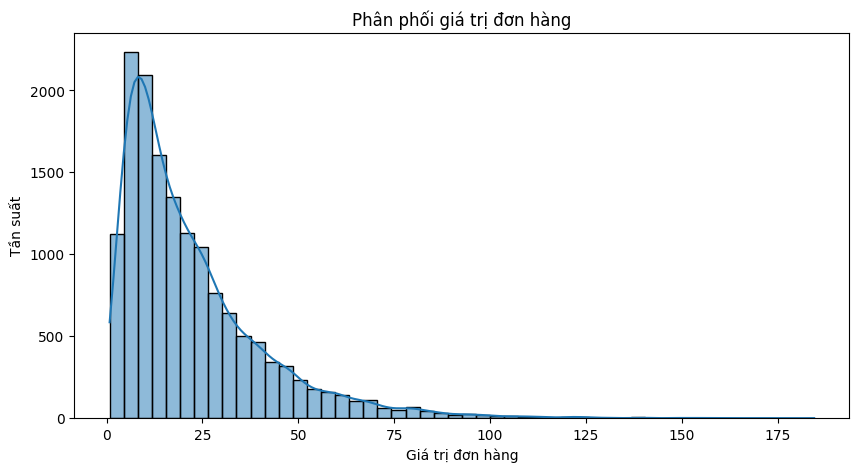

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(order_revenue['total_price'], bins=50, kde=True)
plt.xlabel("Giá trị đơn hàng")
plt.ylabel("Tần suất")
plt.title("Phân phối giá trị đơn hàng")
plt.show()

### Doanh thu theo thời gian

In [ ]:
# Tách năm và số tháng
merged_df['Year'] = merged_df['Month'].dt.year
merged_df['Month_num'] = merged_df['Month'].dt.month
# Gộp
monthly_revenue = merged_df.groupby(['Year', 'Month_num'])['total_price'].sum().reset_index()

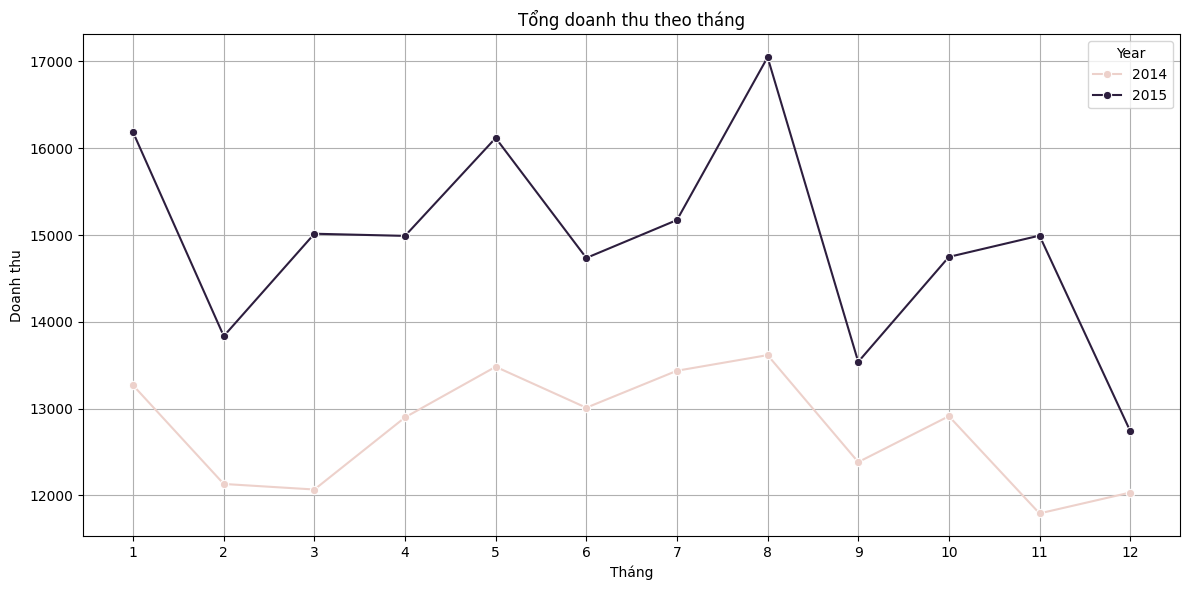

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x='Month_num', y='total_price', hue='Year', marker='o')
plt.xticks(range(1,13))
plt.title('Tổng doanh thu theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Doanh thu')
plt.grid(True)
plt.tight_layout()
plt.show()

### Số lượng giao dịch theo tháng

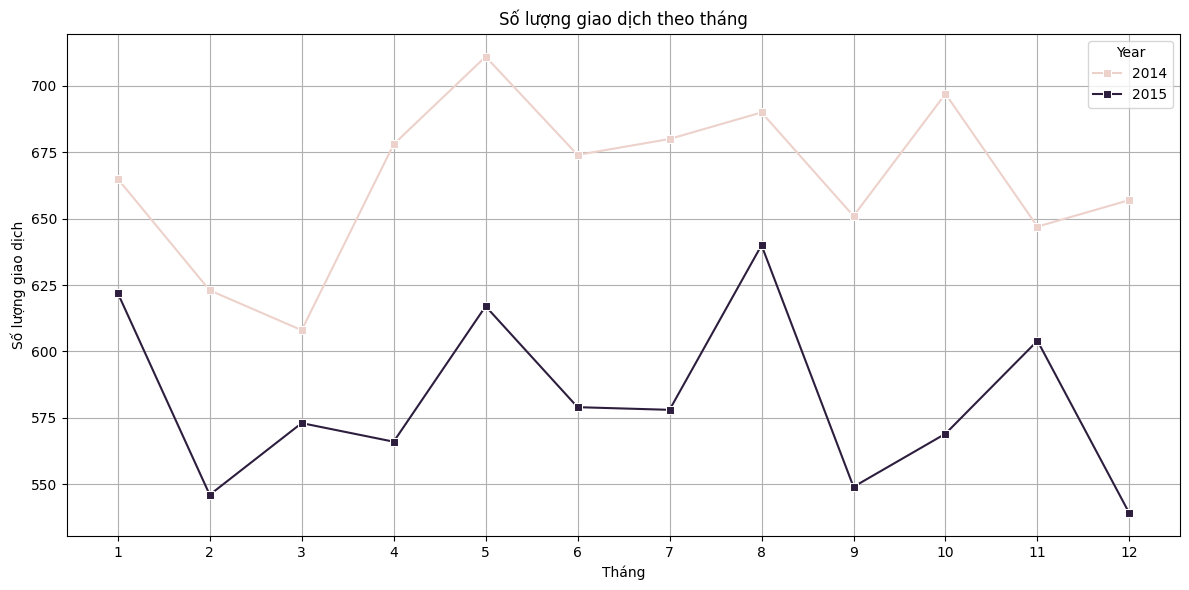

In [ ]:
# Đếm số lượng giao dịch (order_id) theo tháng và năm
monthly_orders = merged_df.groupby(['Year', 'Month_num'])['order_id'].nunique().reset_index()
# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_orders, x='Month_num', y='order_id', hue='Year', marker='s')
plt.xticks(range(1,13))
plt.title('Số lượng giao dịch theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Số lượng giao dịch')
plt.grid(True)
plt.tight_layout()
plt.show()


### Phân tích Top khách hàng – Quy luật 80/20

In [ ]:
# Tính tổng doanh thu của mỗi khách hàng
customer_revenue = merged_df.groupby('Member_number')['total_price'].sum().sort_values(ascending=False)
print(customer_revenue)

Member_number
2433    375.31
2193    361.45
1793    345.10
3289    334.15
2743    312.46
         ...  
4565      2.20
3949      2.10
1560      1.90
1221      1.70
1250      1.30
Name: total_price, Length: 3898, dtype: float64


In [ ]:
# Tính tỷ lệ tích lũy (%)
customer_revenue_pct = customer_revenue.cumsum() / customer_revenue.sum()
print(customer_revenue_pct)

Member_number
2433    0.001130
2193    0.002218
1793    0.003257
3289    0.004263
2743    0.005204
          ...   
4565    0.999979
3949    0.999985
1560    0.999991
1221    0.999996
1250    1.000000
Name: total_price, Length: 3898, dtype: float64


In [ ]:
# Xác định ngưỡng 80% doanh thu
top_20_percent_cutoff = customer_revenue_pct[customer_revenue_pct <= 0.8]
print(f"Số khách hàng tạo ra 80% doanh thu: {len(top_20_percent_cutoff)}")

Số khách hàng tạo ra 80% doanh thu: 2176


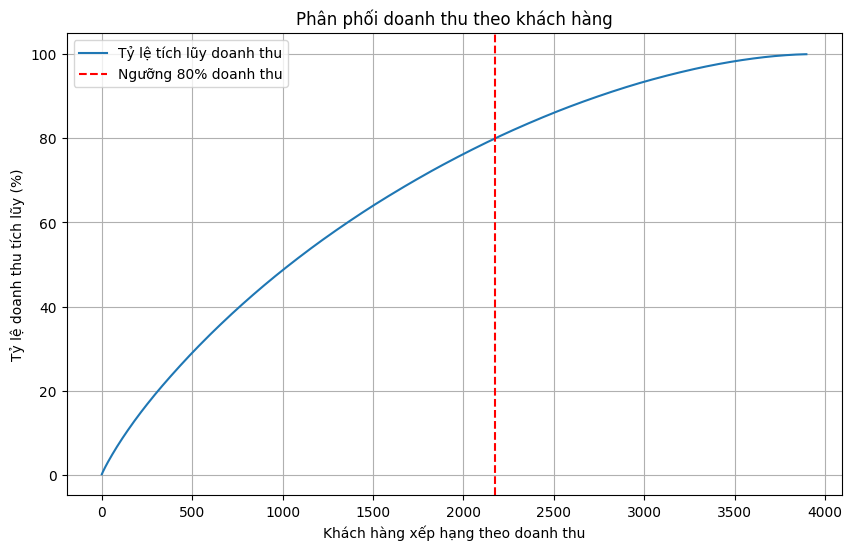

In [ ]:
# Trực quan hoá – biểu đồ Pareto
plt.figure(figsize=(10,6))
plt.plot(customer_revenue_pct.values * 100, label='Tỷ lệ tích lũy doanh thu')
plt.axvline(x=len(top_20_percent_cutoff), color='r', linestyle='--', label='Ngưỡng 80% doanh thu')
plt.xlabel('Khách hàng xếp hạng theo doanh thu')
plt.ylabel('Tỷ lệ doanh thu tích lũy (%)')
plt.title('Phân phối doanh thu theo khách hàng')
plt.legend()
plt.grid(True)
plt.show()

### ADE INSIGHT
Doanh thu 2015 tăng dù số giao dịch giảm, nhờ giá trị đơn hàng cao hơn.

Khách có xu hướng chi tiêu nhiều hơn mỗi lần mua.

Fresh Food & Dairy chiếm >50% doanh thu nhưng rủi ro nếu nguồn cung bị gián đoạn.

Đơn hàng nhỏ (<$30), chỉ 2-3 sản phẩm/lần mua, chưa có chính sách khuyến khích mua nhiều.

Doanh thu có tính mùa vụ, cao vào dịp Tết & năm học mới, có thể tận dụng để tăng doanh thu.

80% sản phẩm bán chậm thuộc nhóm Personal Care, Pet Care và Snacks, dễ dẫn đến tồn kho.

56% khách hàng tạo 80% doanh thu =>  khách hàng đóng góp doanh thu khá phân tán, chưa có nhóm "VIP" rõ rệt. Cửa hàng chưa có chiến lược chăm sóc nhóm khách trọng điểm

## Phân tích giỏ hàng

In [ ]:
from collections import Counter
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from itertools import combinations

### Phân tích BASKET BY ORDER ID
#### Mục tiêu: Khai thác cấu trúc từng đơn hàng để xác định nhóm sản phẩm hay mua cùng.
#### Ứng dụng: Tối ưu trưng bày sản phẩm, thiết kế combo tĩnh theo thói quen thực tế.

In [ ]:
# Gom danh sách sản phẩm theo từng order
basket_by_order = merged_df.groupby(['Member_number', 'Date'])['productName'].apply(list).reset_index(name='basket')

# Đếm tần suất các cặp sản phẩm xuất hiện cùng trong đơn hàng
pair_counter = Counter()
for basket in basket_by_order['basket']:
    unique_items = set(basket)
    for pair in combinations(sorted(unique_items), 2):
        pair_counter[pair] += 1

# Tổng hợp kết quả
order_pair_df = pd.DataFrame(pair_counter.items(), columns=['Product_Pair', 'Count'])
order_pair_df = order_pair_df.sort_values(by='Count', ascending=False)

In [ ]:
# Hiển thị top 10 cặp sản phẩm thường đi chung
order_pair_df.head(10)

,Product_Pair,Count
129,"(other vegetables, whole milk)",222
13,"(rolls/buns, whole milk)",209
14,"(soda, whole milk)",174
8,"(whole milk, yogurt)",167
179,"(other vegetables, rolls/buns)",158
281,"(other vegetables, soda)",145
4,"(sausage, whole milk)",134
28,"(tropical fruit, whole milk)",123
289,"(rolls/buns, soda)",121
130,"(other vegetables, yogurt)",121


/tmp/ipykernel_37243/193607624.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_pairs['Pair'] = top_pairs['Product_Pair'].apply(lambda x: f"{x[0]} + {x[1]}")


<Figure size 1000x600 with 0 Axes>

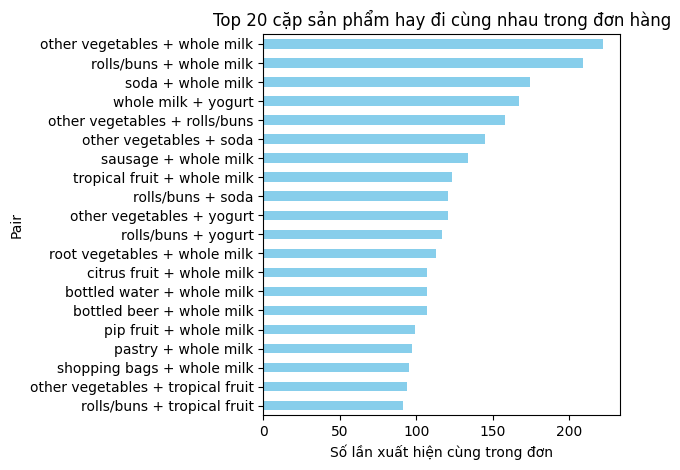

In [ ]:
import matplotlib.pyplot as plt

# Biểu đồ bar Top 20 cặp sản phẩm thường đi cùng nhau
top_pairs = order_pair_df.head(20)
top_pairs['Pair'] = top_pairs['Product_Pair'].apply(lambda x: f"{x[0]} + {x[1]}")

plt.figure(figsize=(10, 6))
top_pairs.sort_values('Count').plot.barh(x='Pair', y='Count', legend=False, color='skyblue')
plt.xlabel('Số lần xuất hiện cùng trong đơn')
plt.title('Top 20 cặp sản phẩm hay đi cùng nhau trong đơn hàng')
plt.tight_layout()
plt.show()


### Phân tích BASKET BY PRODUCT FREQUENCY (Hot + Ế)
#### Mục tiêu: So sánh sản phẩm bán chậm với bán chạy trong giỏ hàng thực tế.
#### Ứng dụng: Đề xuất giảm giá, tặng kèm, khuyến mãi sản phẩm ế khi khách mua sản phẩm hot.

In [ ]:
# Xác định sản phẩm bán chạy và bán chậm
grouped_counts = merged_df['productName'].value_counts()
hot_products = grouped_counts[grouped_counts >= 1000].index.tolist()
slow_products = grouped_counts[grouped_counts < 50].index.tolist()

# Gom giỏ hàng theo khách và ngày
basket_group = merged_df.groupby(['Member_number', 'Date'])['productName'].apply(list)

# Đếm số lần các cặp (hot + slow) xuất hiện cùng
pair_counter = Counter()
for basket in basket_group:
    items = set(basket)
    hot_in_basket = items.intersection(hot_products)
    slow_in_basket = items.intersection(slow_products)
    for hot_item in hot_in_basket:
        for slow_item in slow_in_basket:
            pair_counter[(hot_item, slow_item)] += 1

# Tổng hợp kết quả
hot_slow_df = pd.DataFrame(pair_counter.items(), columns=['Product_Pair', 'Count'])
hot_slow_df[['Hot_Product', 'Slow_Product']] = pd.DataFrame(hot_slow_df['Product_Pair'].tolist(), index=hot_slow_df.index)
hot_slow_df = hot_slow_df[['Hot_Product', 'Slow_Product', 'Count']].sort_values(by='Count', ascending=False)


In [ ]:
# Xem top 10 cặp HOT + Ế xuất hiện nhiều nhất
hot_slow_df.head(20)


,Hot_Product,Slow_Product,Count
151,whole milk,brandy,13
6,whole milk,softener,12
34,whole milk,house keeping products,11
82,soda,spices,9
53,whole milk,artif. sweetener,8
42,whole milk,popcorn,8
63,whole milk,soups,7
17,soda,artif. sweetener,7
41,rolls/buns,popcorn,7
58,whole milk,light bulbs,7


<Figure size 1000x600 with 0 Axes>

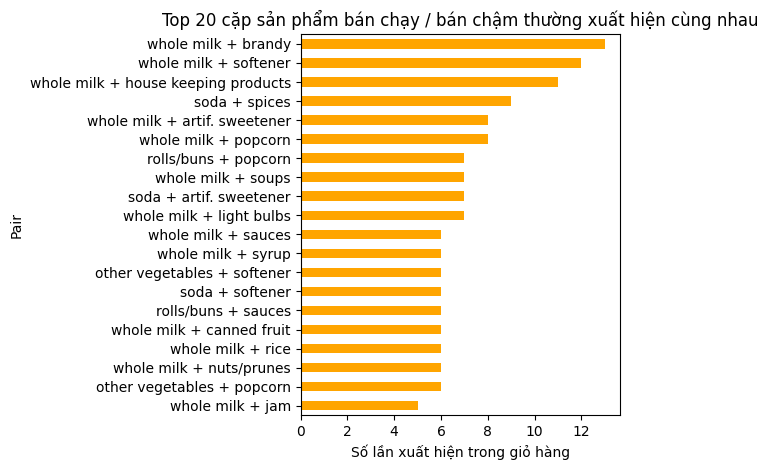

In [ ]:
import matplotlib.pyplot as plt

top_hot_slow = hot_slow_df.head(20).copy()
top_hot_slow['Pair'] = top_hot_slow['Hot_Product'] + ' + ' + top_hot_slow['Slow_Product']

plt.figure(figsize=(10, 6))
top_hot_slow.sort_values('Count').plot.barh(x='Pair', y='Count', legend=False, color='orange')
plt.title('Top 20 cặp sản phẩm bán chạy / bán chậm thường xuất hiện cùng nhau')
plt.xlabel('Số lần xuất hiện trong giỏ hàng')
plt.tight_layout()
plt.show()


### Basket Analysis Insight
Khách hàng có xu hướng mua theo nhóm sản phẩm cố định
 → Các cặp sản phẩm thường đi cùng nhau như whole milk + other vegetables, whole milk + rolls/buns,  rolls/buns + other vegetables
 → Có thể tận dụng để tạo combo phổ biến, giúp tăng giá trị đơn hàng, nâng trải nghiệm mua sắm và duy trì doanh thu định kỳ


Một số sản phẩm bán chậm vẫn được mua cùng sản phẩm chủ lực như Whole milk
 → Chứng tỏ các sản phẩm này vẫn có thể kết hợp, không thực sự “ế”
 → Là cơ hội tiềm năng để thiết kế combo chiến lược, bán chéo và giải phóng hàng tồn.
Ví dụ:
Tặng Whole milk khi khách mua sản phẩm bán chậm có giá trị cao hoặc
Tặng kèm sản phẩm bán chậm nhỏ khi khách mua Whole milk
